"""
Linear regression is a basic predictive analytics technique that uses historical data to predict an output variable.
It is popular for predictive modelling because it is easily understood and can be explained using plain English.

Linear regression models have many real-world applications in an array of industries such as economics (e.g. predicting growth), business (e.g. predicting product sales, employee performance), social science (e.g. predicting political leanings from gender or race),
healthcare (e.g. predicting blood pressure levels from weight, disease onset from biological factors), and more

Understanding how to implement linear regression models can unearth stories in data to solve important problems. 
We’ll use Python as it is a robust tool to handle, process, and model data. It has an array of packages for linear 
regression modelling.

The basic idea is that if we can fit a linear regression model to observed data,
we can then use the model to predict any future values. For example, 
let’s assume that we have found from historical data that the price (P) of a house is linearly dependent upon
its size (S) — in fact, we found that a house’s price is exactly 90 times its size. The equation will look like this:

P = 90*S


With this model, we can then predict the cost of any house. If we have a house that is 1,500 square
feet, we can calculate its price to be:

P = 90*1500 = $135,000


The basic concepts and mathematics behind the model
How to implement linear regression from scratch using simulated data
How to implement linear regression using statsmodels
How to implement linear regression using scikit-learn


There are two kinds of variables in a linear regression model:

The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X.
The output variable is the variable that we want to predict. It is commonly referred to as Y.
To estimate Y using linear regression, we assume the equation:

Yₑ = α + β X

where Yₑ is the estimated or predicted value of Y based on our linear equation.

Our goal is to find statistically significant values of the parameters α and β that minimise the difference between Y and Yₑ.

If we are able to determine the optimum values of these two parameters,
then we will have the line of best fit that we can use to predict the values of Y, given the value of X.



The objective of the least squares method is to find values of α and β that minimise
the sum of the squared difference between Y and Yₑ. We will not go through the derivation here,
but using calculus we can show that the values of the unknown parameters .


where X̄ is the mean of X values and Ȳ is the mean of Y values.

If you are familiar with statistics, you may recognise β as simply
Cov(X, Y) / Var(X).



statsmodels — a module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
scikit-learn — a module that provides simple and efficient tools for data mining and data analysis.
Before we dive in, it is useful to understand how to implement the model from scratch. Knowing how the packages work behind the scenes is important so you are not just blindly implementing the models.

To get started, let’s simulate some data and look at how the predicted values (Yₑ) differ from the actual value (Y):
"""

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(0)

X    = 1.5*np.random.randn(100)*2.5  # Array of 100 values with mean 1.5 and stdev = 2.5
res  = 1.5*np.random.randn(100)    # Generate 100 residual values
Y    = 2+0.7*X+res

#Create a dataframe using Pandas for X and Y

df = pd.DataFrame(

    {'X':X ,
     'Y':Y   
    }

)


print(df.head)


<bound method NDFrame.head of            X         Y
0   6.615196  9.455363
1   1.500590  1.028774
2   3.670267  2.663460
3   8.403349  9.336440
4   7.003342  5.142655
..       ...       ...
95  2.649649  3.597435
96  0.039375  3.185248
97  6.697014  7.923166
98  0.475920  5.577998
99  1.507460  5.060014

[100 rows x 2 columns]>


In [7]:
# I've calculated the beta and alpha two unknow parameters for Y prediction

xmean = np.mean(X)
ymean = np.mean(Y)

df['CovX_Y'] = (df['X']-xmean)*(df['Y']-ymean)
df['Var_X']  = (df['X'] - xmean)**2

beta = df['CovX_Y'].sum()/df['Var_X'].sum()

alpha = ymean - (beta*xmean)


print(f'beta = {beta}')
print(f'alpha = {alpha}')







beta = 0.7458793734185525
alpha = 2.1127296275787715


In [9]:
#Now :let's predict the value of Y

Y_prediction =  alpha+beta*X

print(Y_prediction)




[ 7.0468681   3.23198841  4.85030641  8.38061469  7.33637832 -0.62076317
  4.7701722   1.6893763   1.82402158  3.2611932   2.51562636  6.18040192
  4.24138841  2.45306045  3.35423624  3.04603262  6.29173999  1.53889219
  2.98839491 -0.27621685 -5.02810454  3.94093198  4.53059887  0.0368587
  8.46134147 -1.95520047  2.24071838  1.58916748  6.39998613  6.22259612
  2.54612496  3.17046821 -0.37044941 -3.42765248  1.13960277  2.55004514
  5.55391129  5.47584336  1.02935806  1.26717443 -0.82012298 -1.85912821
 -2.6597894   7.56914136  0.68720819  0.88741493 -1.39139869  4.2874072
 -2.40141955  1.51768493 -0.39193301  3.19491435  0.68398332 -1.18955485
  2.03390259  3.31079428  2.29878147  2.95875794  0.33850051  1.0981253
  0.23182571  1.1070423  -0.16167927 -2.71576507  2.608999    0.9889292
 -2.44701283  3.40715365 -0.42502713  2.25802337  4.15203067  2.47350098
  5.29968764 -1.34113703  3.23809837  0.19728317 -0.32293149  0.49365953
  1.24130235  2.26982677 -1.14625     4.63238424  3.415

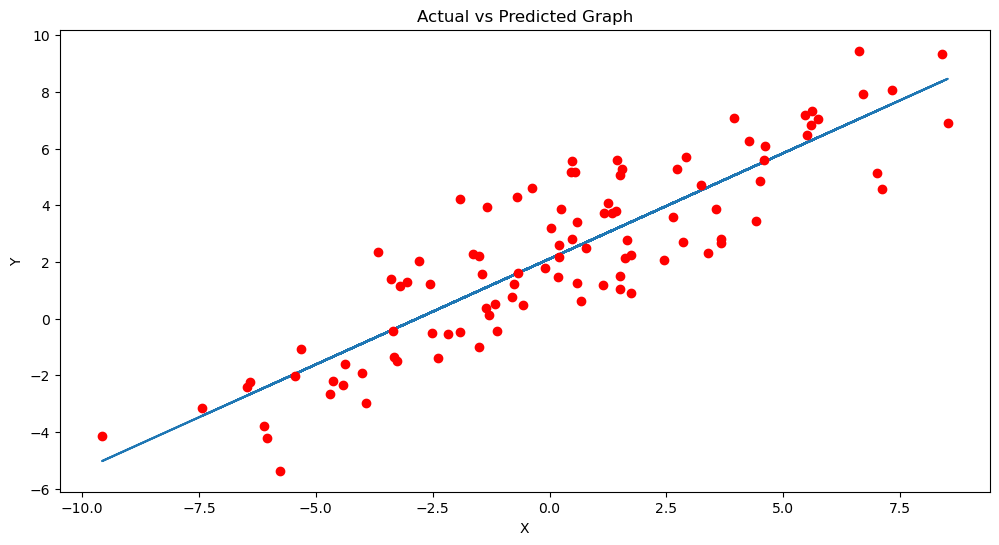

None


In [11]:
#Now lets plot the data with Graph

plt.figure(figsize = (12,6))

plt.plot(X , Y_prediction)  # regression line
plt.plot(X , Y , 'ro')  #Scatter plot using actual data

plt.title('Actual vs Predicted Graph')

plt.xlabel('X')
plt.ylabel('Y')


print(plt.show())



In [13]:
Yprediction = float(0.74) + float(2.11)*(10)

print(Yprediction)               # With known  alpha and beta we have predicted the value of Y with respect to X = 10


21.839999999999996


In [48]:
Salarydata = pd.read_csv('Salary_Data.csv')

print(Salarydata.head(10))
print(Salarydata.reshape(-1,1))


df1    = Salarydata['YearsExperience']/8.5
df2    = Salarydata['Salary']/456312

print(df1)
print(df2)


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
5              2.9   56642
6              3.0   60150
7              3.2   54445
8              3.2   64445
9              3.7   57189


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [44]:
import statsmodels.formula.api as smf

model = smf.ols('df2~df1' , data=df1 )
model2 = smf.ols('df2~df1' , data=df2 )
model = model.fit()
model2 = model2.fit()

print(model)

predict = model.predict()
predict2 = model2.predict()
print(predict)
print(predict2)



[0.07930354 0.08344543 0.08758732 0.09794203 0.10208392 0.11658052
 0.11865146 0.12279335 0.12279335 0.13314807 0.13728995 0.1393609
 0.1393609  0.14143184 0.14971561 0.15799939 0.16214127 0.16628316
 0.17870882 0.18077976 0.19734731 0.20356014 0.22012768 0.22634051
 0.23669523 0.24290806 0.25326277 0.25533372 0.26983032 0.2739722 ]
[0.07930354 0.08344543 0.08758732 0.09794203 0.10208392 0.11658052
 0.11865146 0.12279335 0.12279335 0.13314807 0.13728995 0.1393609
 0.1393609  0.14143184 0.14971561 0.15799939 0.16214127 0.16628316
 0.17870882 0.18077976 0.19734731 0.20356014 0.22012768 0.22634051
 0.23669523 0.24290806 0.25326277 0.25533372 0.26983032 0.2739722 ]


In [53]:
# Now let's implement the Linear Regression Model using the Scikit-learn 


from sklearn.linear_model import LinearRegression

# Build linear regression model using Salary and YearsExperience as predictors
# Split data into predictors X and output Y
predictors = ['Salary', 'YearsExperience']
X = Salarydata[predictors]
y = Salarydata['Salary']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

print(lm)
print(model)


LinearRegression()
LinearRegression()


In [54]:

print(f'alpha = {model.intercept_}')  # to find the value of alpha
print(f'betas = {model.coef_}')     # to find the value of beta


alpha = 1.4551915228366852e-11
betas = [ 1.00000000e+00 -2.51489117e-12]


In [55]:
print(model.predict(X))


[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [57]:
new_X = [[300, 200]]
print(model.predict(new_X))

[300.]


C:\Users\hjha0\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Now let's Create Linear Regression Model using Scikit Learn



In [58]:
# Import the packages and classes needed in this example:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a numpy array of data:
x = np.array([6, 16, 26, 36, 46, 56]).reshape((-1, 1))
y = np.array([4, 23, 10, 12, 22, 35])

# Create an instance of a linear regression model and fit it to the data with the fit() function:
model = LinearRegression().fit(x, y) 

# The following section will get results by interpreting the created instance: 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

# Predict a Response and print it:
y_pred = model.predict(x)
print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.5417910447761193
intercept: 4.026666666666667
slope: [0.44]
Predicted response:
[ 6.66666667 11.06666667 15.46666667 19.86666667 24.26666667 28.66666667]


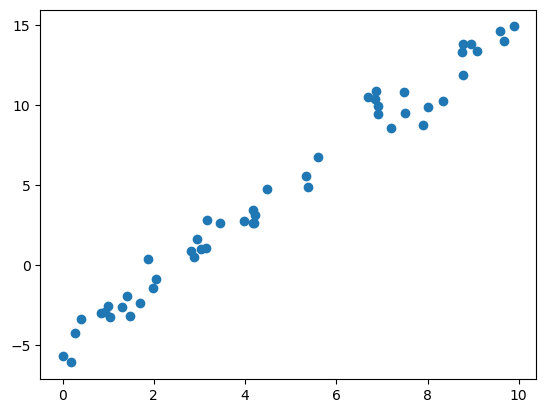

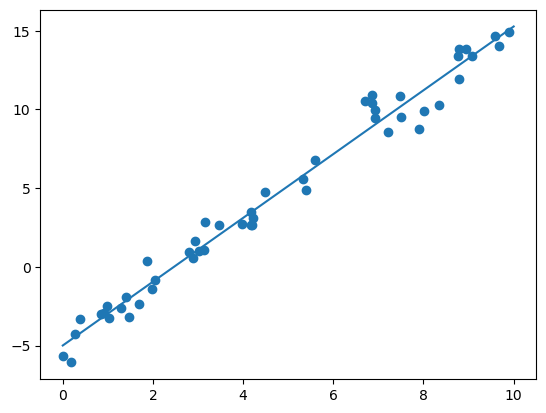

In [59]:
# Import the packages and classes needed for this example:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create random data with numpy, and plot it with matplotlib:
rnstate = np.random.RandomState(1)
x = 10 * rnstate.rand(50)
y = 2 * x - 5 + rnstate.randn(50)
plt.scatter(x, y);
plt.show()

# Create a linear regression model based the positioning of the data and Intercept, and predict a Best Fit:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Plot the estimated linear regression line with matplotlib:
plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()